### Start with some quick review questions

1. The bias of a coin is 0.8 in favor of Heads, what is the probability of flipping fewer than 4 heads out of 10 flips of the coin?


In [15]:
import scipy.stats as stats
p = 0.8
n = 10
k = 4

f'P(k < 4): {stats.binom(n=10, p=0.8).cdf(k-1)}'


'P(k < 4): 0.0008643583999999986'

In [ ]:
stats.binom()

2. Using the parameters above, create a simulation using scipy.stats to flip this coin 10 times and view the results.


In [9]:
[stats.binom(n=10, p=0.8).pmf(k) for k in range(10+1)]

[1.0240000000000004e-07,
 4.096000000000007e-06,
 7.372799999999991e-05,
 0.0007864319999999992,
 0.005505024000000001,
 0.02642411520000004,
 0.08808038400000004,
 0.20132659200000014,
 0.301989888,
 0.26843545600000035,
 0.10737418240000005]

3. Describe a sampling distribution? (maybe give an example if that is easier)
4. How would you set up a bootstrapped sample?

The frequency distribution of a sample statistic over many samples or resamples.

In [11]:
import numpy as np
binom_sample = stats.binom(n=10, p=0.8).rvs(10)
resamples = 10

binom_bootstrap_samples = [np.random.choice(binom_sample, size=len(binom_sample), replace=True) for _ in range(resamples)]
binom_bootstrap_samples

[array([8, 7, 8, 8, 7, 7, 6, 8, 8, 8]),
 array([8, 6, 8, 8, 8, 8, 8, 8, 8, 7]),
 array([8, 8, 8, 6, 7, 8, 8, 6, 8, 8]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8]),
 array([8, 8, 8, 7, 8, 7, 8, 8, 8, 8]),
 array([8, 7, 8, 8, 8, 8, 8, 8, 8, 8]),
 array([8, 8, 8, 8, 6, 8, 8, 6, 8, 8]),
 array([8, 7, 8, 8, 8, 8, 8, 8, 6, 7]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8]),
 array([8, 8, 8, 6, 8, 8, 8, 7, 8, 8])]

# Central Limit Theorem

## Success Criteria
By the end of class I will be successful if I can...

1. Explain the central limit theorem in general terms
2. Express with confidence information about the normal distribution
3. Compute the standard error of a sample metric
4. Compute a confidence interval of a sample without bootstrapping




#### As discussed earlier, there are many different types of distributions which emerge from various real-world situations

#### The Normal, Gaussian or Bell Curve is perhaps the best known, and many distributions bear a passing resemblence to the normal curve, *however* most distributions are not the Normal distribution

#### The Normal curve has been well studied and is relatively easy to calculate, so it would be nice if all random variables could be represented by the normal curve

#### The central limit theorem gives us a way to transform non-normal distirbutions into normal distributions (under certain circumstances)

# The Central Limit Theorem

### The Normal (Gaussian) Distribution

The **normal** or **gaussian** distribution has a hallowed place in statistical folklore, mostly due to the **central limit theorem** that we'll study shortly.

Carl Freidrich Gauss derived it when he was asked by an astronomer to help him locate a new planet (that he had lost).  Gauss started by modeling astronomical measurement errors and proceeded to derive it. [source](https://www.math.utah.edu/~kenkel/normaldistributiontalk.pdf)

The traditional notation for a normal random variable is $Z$ (instead of $X$, used for pretty much any other random variable).

A normal random variable $Z$ has the cumulative distribution function

$$ \Phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \int_{- \infty}^t e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } dx $$

The $\Phi$ is, again, traditional notation for the cumulative distribution function of a normal random variable. 

By differentiating, we get the density function of a normal random variable

$$ \phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } $$

The integral for the CDF of the normal distribution does *not* have a closed form.  In practice, the only way to compute values of the distribution function of a normal random variable is numerically using a computer.

### Parameters of the Normal Distribution

The $\mu$ (mean) and $\sigma$ (standard deviation) are the parameters of the distribution.  

# Changing $\mu$ translates the distribution function to the right and left

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [12]:
norm_dist = stats.norm(8, 10)
norm_dist.interval(0.68)

(-1.9445788320975304, 17.944578832097534)

In [18]:
normal_dists_varying_mean = [
    stats.norm(mu, 1) for mu in [-2, -1, 0, 1, 2]
]
normal_dists_varying_mean

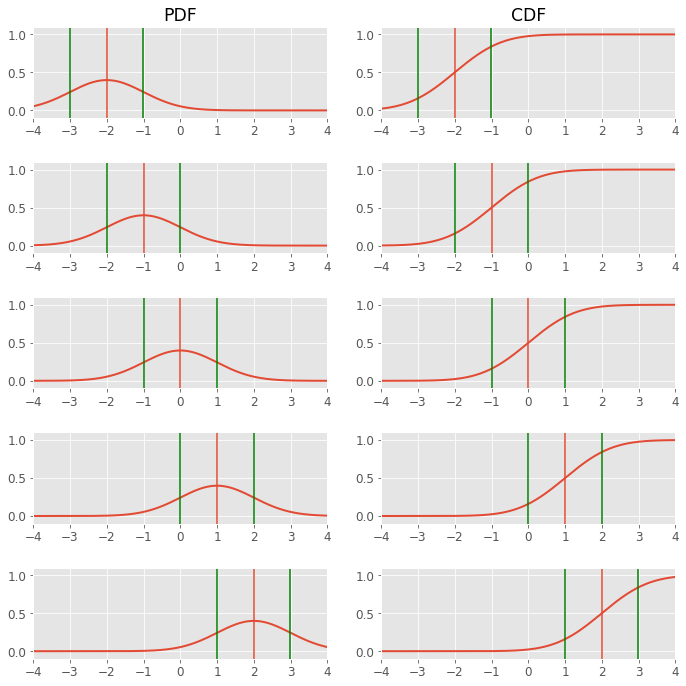

In [24]:
normal_dists_varying_mean = [
    stats.norm(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for col, func in zip([0,1],[lambda z:z.pdf(x), lambda z:z.cdf(x)]):

    for i, ax in enumerate(axs[:,col].flatten()):
        ax.plot(x, func(normal_dists_varying_mean[i]), linewidth=2)
        if i ==0:
            titles = ['PDF', 'CDF']
            ax.set_title(f'{titles[col]}')
        ax.set_ylim(-0.1, 1.1)
        ax.set_xlim(-4, 4)
        ax.axvline(normal_dists_varying_mean[i].mean())
        for interval in normal_dists_varying_mean[i].interval(.68):
            ax.axvline(interval, color = 'green')

plt.tight_layout(pad=2)

# Changing $\sigma$ stretches and shrinks the distribution function horizontally

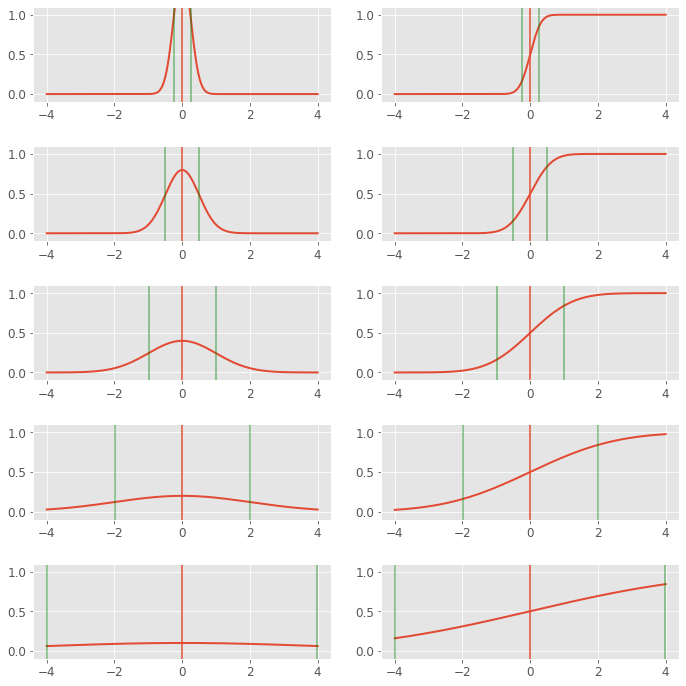

In [19]:
normal_dists_varying_sigma = [
    stats.norm(0, sigma) for sigma in [0.25, 0.5, 1, 2, 4]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for col, func in zip([0,1],[lambda z:z.pdf(x), lambda z:z.cdf(x)]):

    for i, ax in enumerate(axs[:,col].flatten()):
        ax.plot(x, func(normal_dists_varying_sigma[i]), linewidth=2)
        ax.set_ylim(-.1,1.1)
        ax.axvline(normal_dists_varying_sigma[i].mean())
        for interval in normal_dists_varying_sigma[i].interval(.68):
            ax.axvline(interval, color = 'green', alpha = .5)

plt.tight_layout(pad=2)

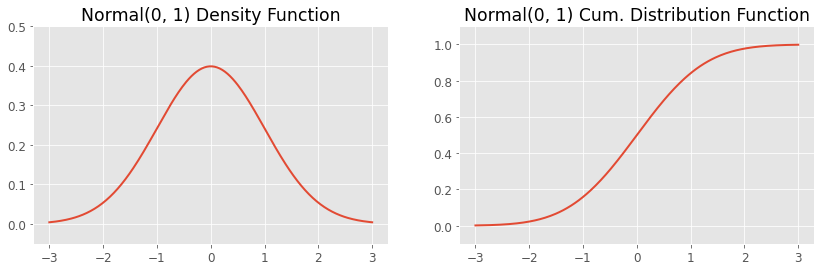

In [26]:
normal = stats.norm(0, 1) # instantiates the object <- good practice

x = np.linspace(-3, 3, num=251)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[1].plot(x, normal.cdf(x), linewidth=2)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_title("Normal(0, 1) Cum. Distribution Function")

ax[0].plot(x, normal.pdf(x), linewidth=2)
ax[0].set_ylim(-0.05, 0.5)
ax[0].set_title("Normal(0, 1) Density Function");

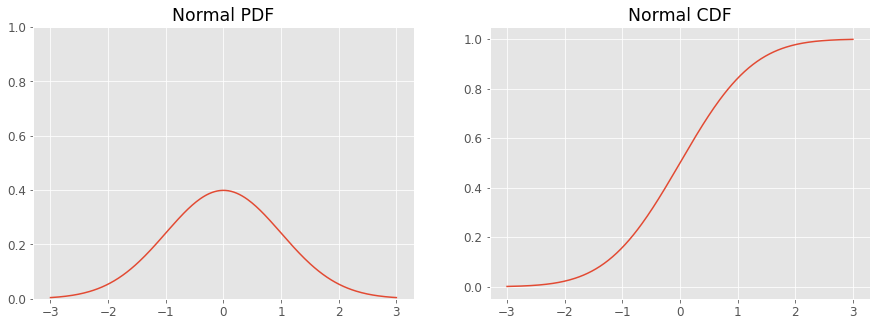

In [34]:
normal = stats.norm(loc=0, scale=1)

x = np.linspace(-3,3, num=250)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(x, normal.pdf(x))
ax[0].set_title('Normal PDF')
ax[0].set_ylim([0,1])

ax[1].plot(x, normal.cdf(x))
ax[1].set_title('Normal CDF');


### Consider our normal Distribution above to answer the following: 
 
1. What is the probability that a random variable drawn from this distribution is exactly equal to 2? 
<!-- 0  -->
2. What is the probability that a random variable drawn from this distribution is around 2? 

<!-- normal.pdf(2) = 0.054 -->

3. What is the probability that a random variable drawn from this distribution is between 1 and 2?

<!-- normal.cdf(2) - normal.cdf(1) = 0.134 -->
 
4. What is the probability a random value drawn from this distribution is either between 1 and 2, or between -1 and -0.5?

<!-- (normal.cdf(2) - normal.cdf(1)) + (normal.cdf(-0.5) - normal.cdf(-1)) = 0.286-->

##### *Use cdf/pdf to get answers*

In [35]:
0

0

In [37]:
normal.pdf(2)

0.05399096651318806

In [38]:
normal.cdf(2) - normal.cdf(1)

0.13590512198327787

In [39]:
(normal.cdf(2) - normal.cdf(1)) + (normal.cdf(-0.5) - normal.cdf(-1)) 

0.2857874067778077

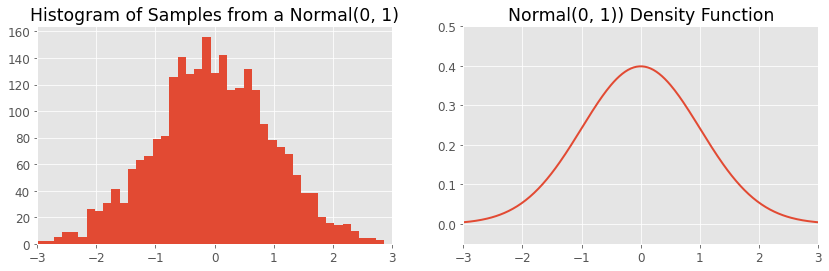

In [42]:
normal_samples = normal.rvs(2500) # drawing random samples

x = np.linspace(-3, 3, num=251)
fig, ax = plt.subplots(1, 2, figsize=(14, 4)) # 2 axes: 0, 1

# axes 0
ax[0].hist(normal_samples, bins=50, density=False)
ax[0].set_xlim(-3, 3)
#ax[0].set_ylim(-0.05, 0.5) #  use if density=True
ax[0].set_title("Histogram of Samples from a Normal(0, 1)")

# axes 1
ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Normal(0, 1)) Density Function");

## The Central Limit Theorem

A primary application of the normal distribution is the central limit theorem.  Let's show why.

### The Distribution of the Sample Means

Let's return to the distribution of a very popular statistic, the **distribution of the sample means**. Remember how we worked with these sample statistics during our bootstrapping conversation. 

Consider a fixed population, and for the moment, suppose we have the power to sample freely, as many data points as we wish

In [44]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

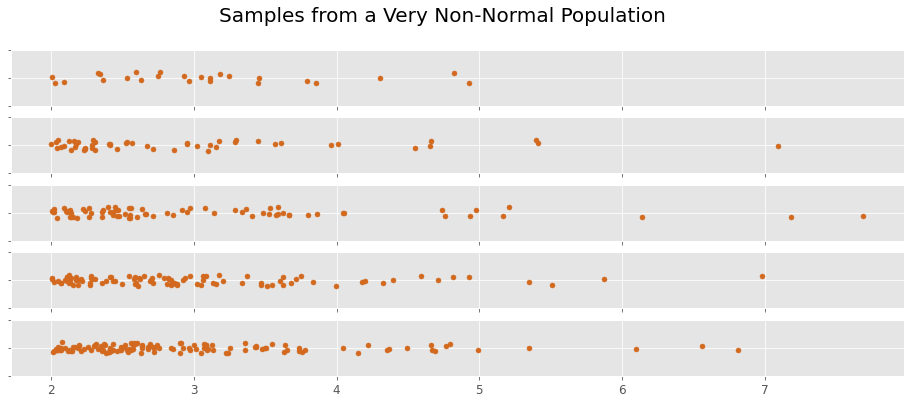

In [53]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

population = stats.expon(2)
sample_sizes = [25, 50, 75, 100, 125]
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="#d2691e")
    
fig.suptitle("Samples from a Very Non-Normal Population", fontsize=20);

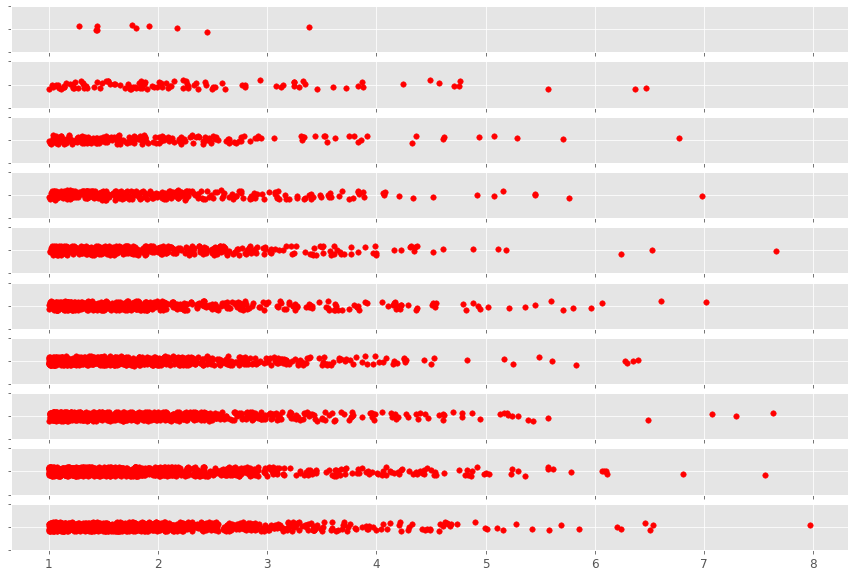

In [59]:
expon = stats.expon(loc=1)

sample_sizes = list(range(10, 1000, 100))

fig, axs = plt.subplots(len(sample_sizes), sharex=True, figsize=(15,10))

for i, ax in enumerate(axs):
    expon_sample = expon.rvs(size=sample_sizes[i])
    one_dim_scatterplot(expon_sample, ax , s=30, c="red");

# Suppose we fix a sample size, and repeatedly sample from the population with that fixed size

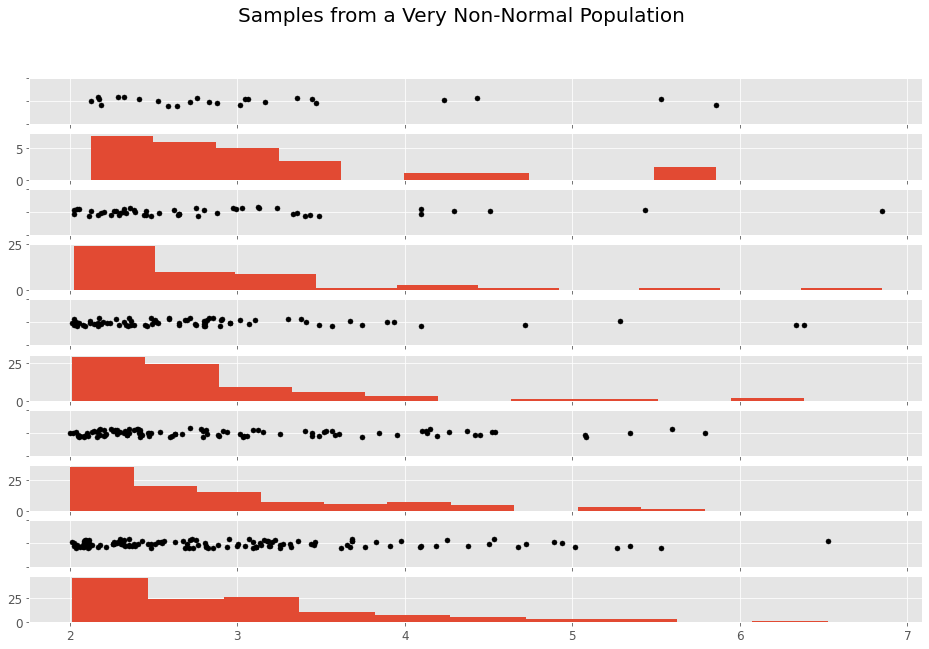

In [65]:
sample_sizes = [25, 50, 75, 100, 125]
sample_size = 50

fig, axs = plt.subplots(10, figsize=(16, 10), sharex=True)

for i, sample_size in enumerate(sample_sizes):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, axs[2*i], s=25, c="black")
    axs[2*i+1].hist(sample)
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", fontsize=20)

Remember, the **sampling distribution of the mean** is the distribution of the means computed from these *different samples*.

Here, we've superimposed the sample means on each of our sample means.



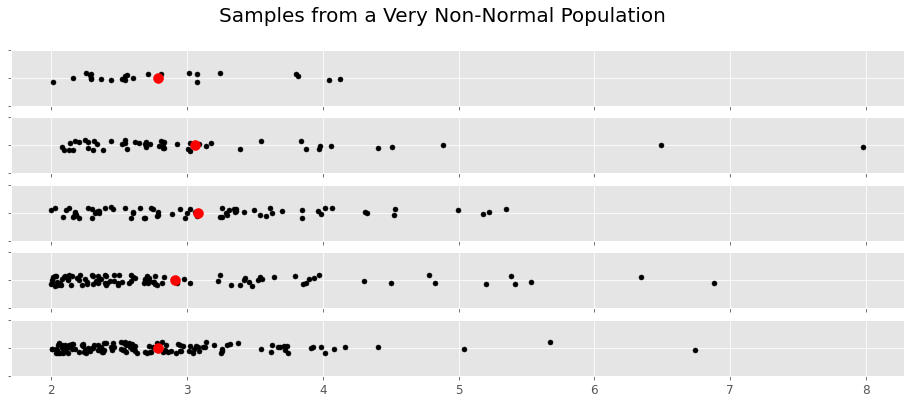

In [66]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.rvs(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax.scatter(sample.mean(), 0, color='red', s=100)
    
_ = fig.suptitle("Samples from a Very Non-Normal Population", 
                 fontsize=20)

Let's do that, let's repeatedly sample, compute the means of the samples, then plot the distribution of these means.

Each of the red dots in the above visualization is counted **one time** in the histogram below.

In [67]:
#n_samples is number of samples from populaton
#n_summands is how many values are in each sample
#sampler is our population to sample from

def sample_from_repeated_sum(n_samples, n_summands, sampler):
    """Sample n_samples from the sum of n_summands iid copies of a random
    varaible.
    """
    samples = sampler.rvs(n_samples*n_summands).reshape(n_samples, n_summands)
    return np.sum(samples, axis=1)

def sample_means_from_population(n_samples, n_summands, sampler): 
    return (1.0/n_summands) * sample_from_repeated_sum(n_samples, n_summands, sampler)

In [73]:
print(sample_from_repeated_sum(10,5,stats.norm()))
sample_means_from_population(10,5, stats.norm())

[-2.10739821  2.79179581  0.18418461  2.90481428 -1.28374673 -1.91557209
  1.21748395  1.88317206  0.20773159 -3.4972915 ]


array([ 0.49134489,  0.45916901,  0.2663836 ,  0.49915644, -0.79039191,
        0.15084028,  0.67385803, -0.54852628,  0.13821911, -0.3797155 ])

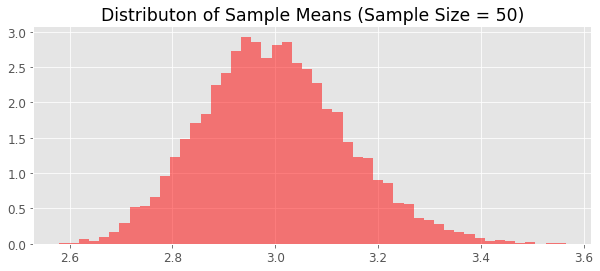

In [79]:
population = stats.expon(2)
sample_means = sample_means_from_population(
    n_samples=10000, n_summands=50, sampler=population)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=50, density=True, color="red", alpha=0.5)
_ = ax.set_title("Distributon of Sample Means (Sample Size = 50)")

## The averaging has greatly reduced the rightward skew of our original data distribution. 

### Our process has smothed out the original distribution and made it look symmetrical

Let's overlay a normal distribution with the correct mean and variance.

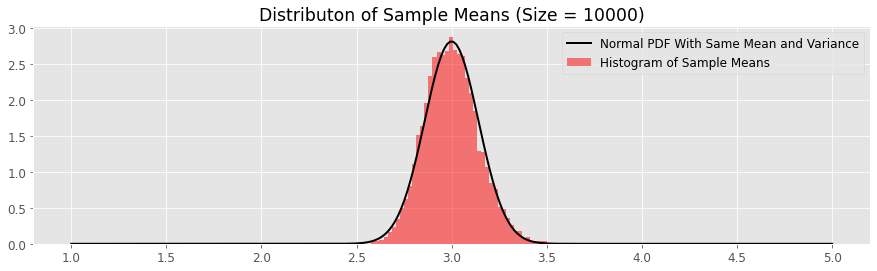

In [77]:
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
sample_means_model = stats.norm(mean_sample_means, 
                                np.sqrt(variance_sample_means))

fig, ax = plt.subplots(1, figsize=(15, 4))
ax.hist(sample_means, bins=50, density=True, color="red", alpha=0.5,
            label="Histogram of Sample Means")
x = np.linspace(1, 5, num=250)
ax.plot(x, sample_means_model.pdf(x), linewidth=2, color="black", 
        label="Normal PDF With Same Mean and Variance")
ax.set_title("Distributon of Sample Means (Size = 10000)")
ax.legend(loc='upper right');

Yah, that looks pretty close.

## The Central Limit Theorem

The **central limit theorem** asserts that as we take the mean of larger and larger samples, the distribution of sample means becomes more and more normal.

Said differently, probabilistic statements about the mean of a large sample can be well approximated by assuming that the distribution of the sample means is a normal distribution with the correct mean and variance.

### Note:  The Central Limit Theorem does not say that "as we take more and more samples, the distribution becomes normal."

#### For the Central Limit Theorem to work, we have to do *something* to a our samples, such as take the mean or the sum.

# CLT Experimentation with Sample Sums - Mekdi

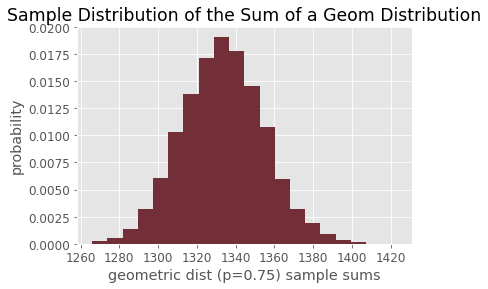

In [92]:
# Geometric Distribution

def samples_from_pop(n_samples, sample_size, population):
    samples = population.rvs(n_samples*sample_size).reshape(n_samples,sample_size)
    return np.sum(samples, axis=1)

population = stats.geom(p=0.75)
n_samples = 10000
sample_size = 1000
sum_samples = samples_from_pop(n_samples, sample_size, population)


fig, ax = plt.subplots()

ax.hist(sum_samples, bins=20, density=True, color='#722F37')
ax.set_xlabel('geometric dist (p=0.75) sample sums')
ax.set_ylabel('probability')
ax.set_title('Sample Distribution of the Sum of a Geom Distribution');



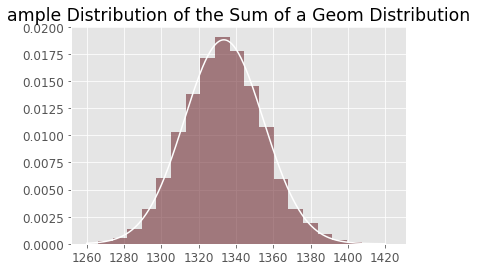

In [94]:
mean_sum_samples = np.mean(sum_samples)
std_sum_samples = np.std(sum_samples)
sample_sum_model = stats.norm(mean_sum_samples, std_sum_samples)

fig, ax = plt.subplots()

x = np.linspace(1260,1420, num=500)

ax.hist(sum_samples, bins=20, density=True, label ='hist of sample sums', color='#722F37', alpha=0.6)
ax.plot(x, sample_sum_model.pdf(x), label='Normal dist PDF', color = 'white')
ax.set_title('ample Distribution of the Sum of a Geom Distribution');


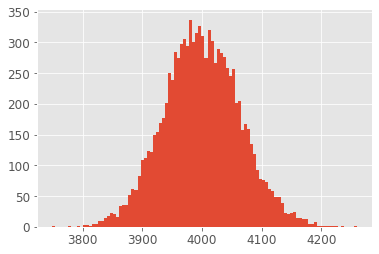

In [91]:
population = stats.expon(2, scale = 2)
samples = population.rvs([10000, 1000])
sums = np.sum(samples, axis=1)

plt.hist(sums, bins =100);

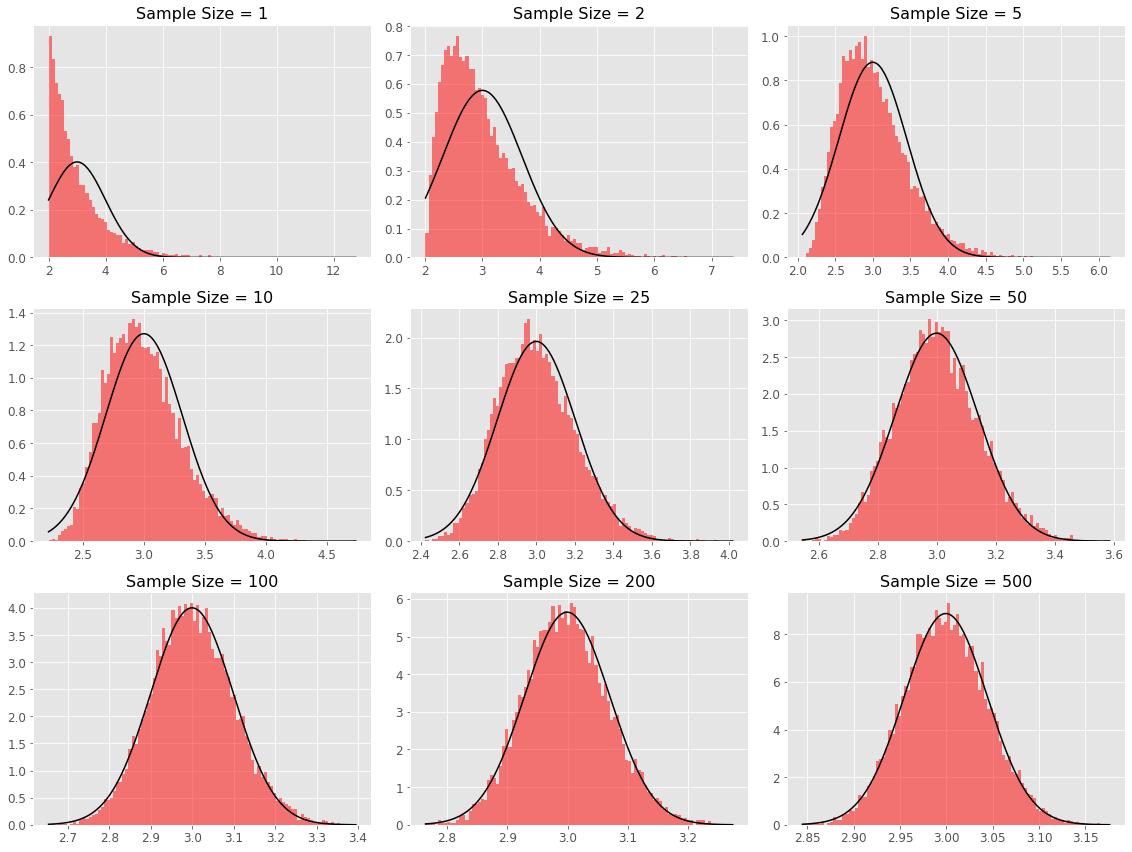

In [116]:
# running 10,000 simulations, and mean is based on varying
# size of sample
population = stats.expon(2)
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = sample_means_from_population(
        n_samples=10000, n_summands=sample_size, sampler=population)
    variance_sample_means = np.var(sample_means)
    sample_means_model = stats.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, density=True, color="red", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t), color="black")
    ax.set_title(f"Sample Size = {sample_size}", fontsize=16)
fig.tight_layout()

In [106]:
n_samples = np.linspace(100, 10000, num=9).astype(int)
n_samples



array([  100,  1337,  2575,  3812,  5050,  6287,  7525,  8762, 10000])

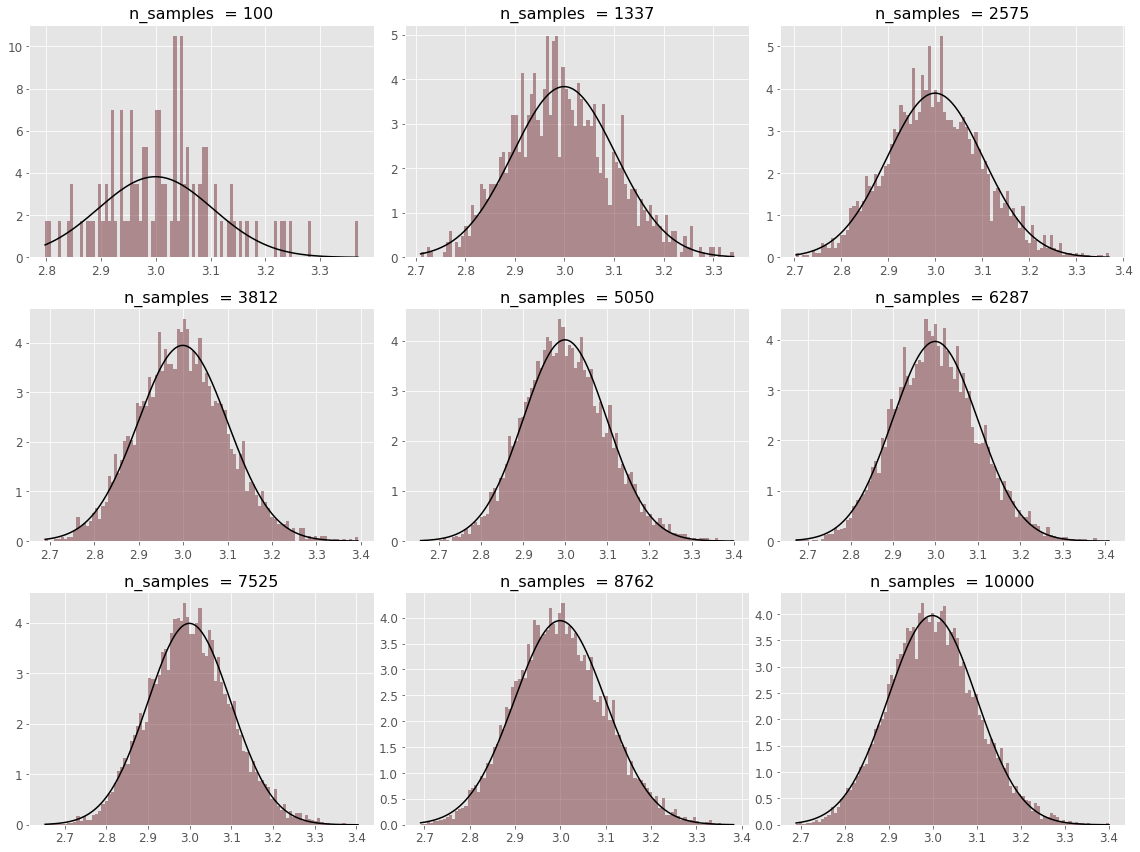

In [119]:
# fixed sample size with varying n_samples

population = stats.expon(2)
n_samples = np.linspace(100, 10000, num=9).astype(int)

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for n_sample, ax in zip(n_samples, axs.flatten()):
    sample_means = sample_means_from_population(
        n_samples=n_sample, n_summands=100, sampler=population)
    variance_sample_means = np.var(sample_means)
    sample_means_model = stats.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, density=True, color="#722F37", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t), color="black")
    ax.set_title(f"n_samples  = {n_sample}", fontsize=16)
fig.tight_layout()

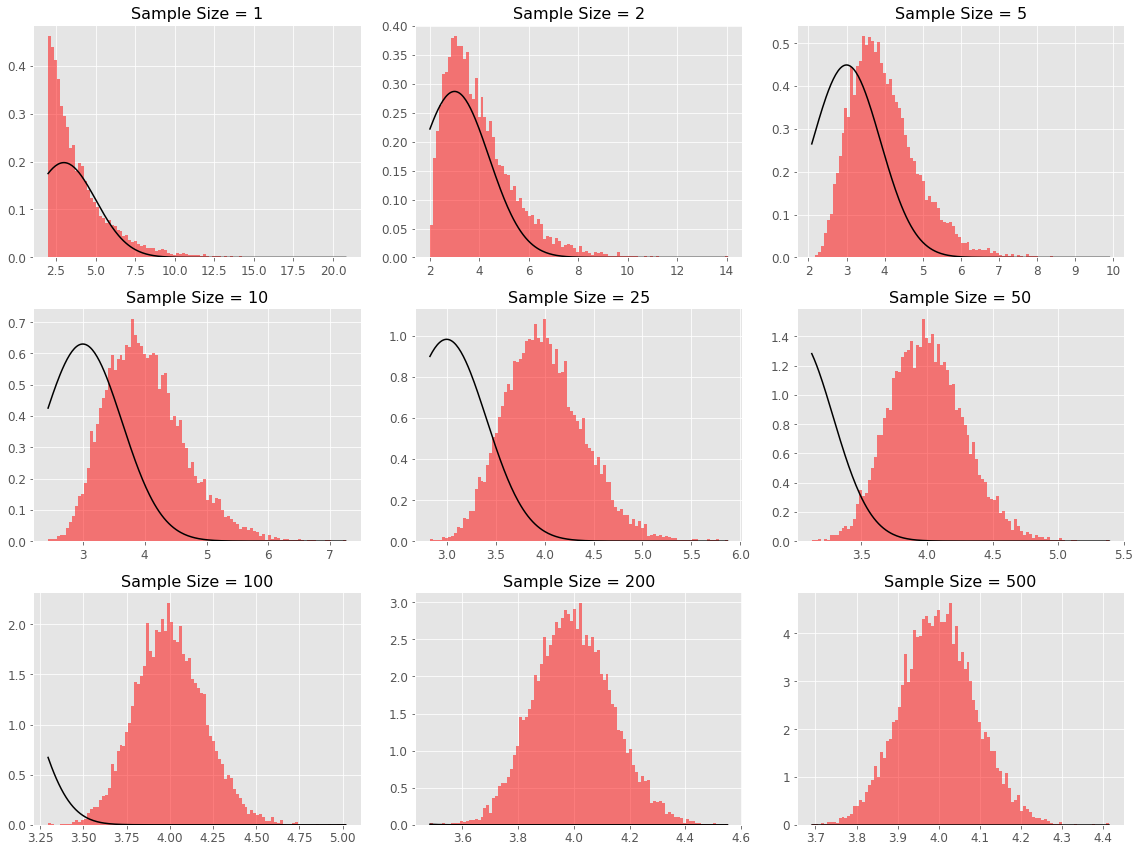

In [125]:
# running 10,000 simulations, and mean is based on varying
# size of sample
population = stats.expon(2, scale=2)
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = sample_means_from_population(
        n_samples=10000, n_summands=sample_size, sampler=population)
    variance_sample_means = np.var(sample_means)
    sample_means_model = stats.norm(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, density=True, color="red", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t), color="black")
    ax.set_title(f"Sample Size = {sample_size}", fontsize=16)
fig.tight_layout()

### Statement of the Central Limit Theorem

Suppose $X_1, X_2, \ldots$ are i.i.d. copies of a random varaiable with finite expectation and variance

$$ E[X_1] = E[X_2] = \cdots = \mu $$
$$ var[X_1] = var[X_2] = \cdots = \sigma^2 $$

Then the distribution of sample means tends to a normal distribution with the appropriate mean and standard deviation:

$$ \frac{X_1 + X_2 + \cdots + X_k}{k} \rightarrow N \left( \mu, \frac{\sigma}{\sqrt{k}} \right) $$

as $k \rightarrow \infty$.

**Note:** The CLT also applies to a simple sum, though the mean and variance are different

$$ X_1 + X_2 + \cdots + X_k \rightarrow N \left( k \mu, \sqrt{k} \sigma \right) $$

The type of convergence is the CLT is called [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution).

A couple of notes

  - The stunning part of the central limit theorem is that it makes almost no assumptions about $X$.  $X$ can be anything, and it's sample means will always tend to be normal.
  - The central limit theorem is a **miracle**, pure and simple.  There is no real *reason* it is true, it just is.  Consider it a gift of rare order in the universe, more like a fundamental law of physics than an intuitive mathematical fact.
  - Here's an elevator pitch statement of the central limit theorem, good for job interviews: **The central limit theorem allows us to make probabilistic statements about the sample mean from any population using the normal distribution.**

### Example: The Binomial Distribution

Consider a binomial distribution $Binom(n, p)$, which assigns probabilities to the number of heads shown in $n$ flips of a coin where the probability of seeing a head in a **single flip** is $p$.

Consider a variable $X$ which is distributed as binomial

$$ X \sim Binom(n, p) $$

and also a ton of variables representing **single coin flips**

$$ X_1, X_2, \ldots \sim Binom(1, p) $$

**Claim:** $X \sim X_1 + X_2 + \cdots + X_n$

**Question:** Why?

The central limit theorem has an immediate consequence:  Binomial distributions with large $n$ tend to be approximately normal!

$$ Binom(n, p) \sim N(np, \sqrt{n p (1 - p)} ) $$


<!-- $npq$ or $np(1-p)$ is the variance of the binomial distribution and the standard deviation is the square root of the variance. 

$pq$ is the variance of the bernoulli distribution.  -->

In [127]:
# binomial = stats.binom(n = 1_000_000, p = 0.4)

# normal_approx = stats.norm(np.mean(binomial_sample), binomial.std())

# binomial ~ normal_approx
#VISUAL BELOW TO HELP SHOT

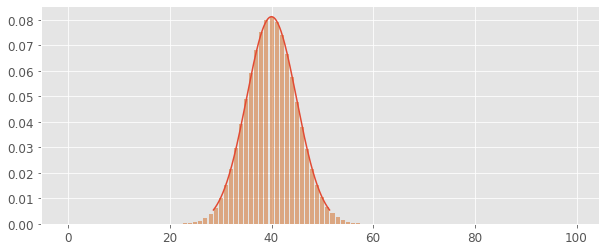

In [166]:
binomial = stats.binom(n = 100, p = 0.4)
binomial_sample = binomial.rvs(100_000)

normal = stats.norm(np.mean(binomial_sample), np.std(binomial_sample))
fig, ax = plt.subplots(1, figsize=(10,4))
x = np.arange(100)
ax.bar(x, binomial.pmf(x), color='#d2691e', alpha=0.5)
# ax.hist(binomial_sample, bins=100, color='brown', density=True, alpha=0.5)
# ax.hist(binomial_sample, bins=100, density=True, color="red", alpha=0.5)

x = np.linspace(normal.ppf(0.01), normal.ppf(0.99), 250)
ax.plot(x, normal.pdf(x));

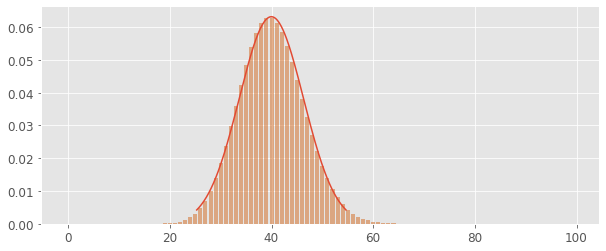

In [167]:
poisson = stats.poisson(mu=40)
poisson_sample = poisson.rvs(100_000)

normal = stats.norm(np.mean(poisson_sample), np.std(poisson_sample))
fig, ax = plt.subplots(1, figsize=(10,4))
x = np.arange(100)
ax.bar(x, poisson.pmf(x), color='#d2691e', alpha=0.5)
# ax.hist(binomial_sample, bins=100, color='brown', density=True, alpha=0.5)
# ax.hist(binomial_sample, bins=100, density=True, color="red", alpha=0.5)

x = np.linspace(normal.ppf(0.01), normal.ppf(0.99), 250)
ax.plot(x, normal.pdf(x));

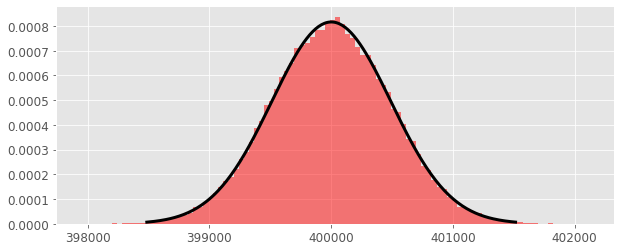

In [136]:
binomial = stats.binom(n = 1_000_000, p = 0.4)
binomial_sample = binomial.rvs(100_000)

binomial_sample_mean = np.mean(binomial_sample)
binomial_sample_variance = np.var(binomial_sample)
normal_approx = stats.norm(
    binomial_sample_mean, np.sqrt(binomial_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(binomial_sample, bins=100, density=True, color="red", alpha=0.5)
x = np.linspace(binomial.ppf(.001), binomial.ppf(.999), num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3, color="black");

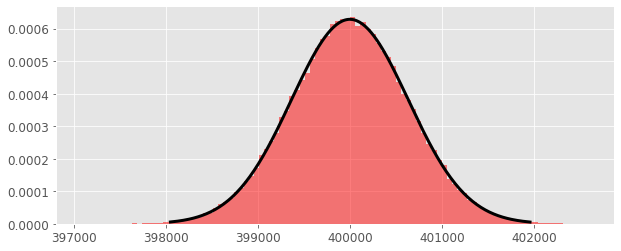

In [169]:
poisson = stats.poisson(mu=400000)
poisson_sample = poisson.rvs(100_000)

poisson_sample_mean = np.mean(poisson_sample)
poisson_sample_variance = np.var(poisson_sample)
normal_approx = stats.norm(
    poisson_sample_mean, np.sqrt(poisson_sample_variance))

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(poisson_sample, bins=100, density=True, color="red", alpha=0.5)
x = np.linspace(poisson.ppf(.001), poisson.ppf(.999), num=250)
ax.plot(x, normal_approx.pdf(x), linewidth=3, color="black");

An immediate consequence: Binomial probabilities with large $n$ can be well approximated using the normal distribution.

### Check for understanding: Binomial Probabilities

You flip a fair coin 10,000 times.  What is the probability that you flip heads between 5000 and 5100 times?

* Work it out using the scipy.stats binomial distribution.  
* Then work it out using the scipy.stats normal distribution.

Do you get the same answer?

<!--
n = 10000
p = 0.5
coin_binom = stats.binom(n,p)
prob_binom = coin_binom.cdf(5100) - coin_binom.cdf(4999)
prob_binom.round(3) -->

<!-- 
mu = n * p
std = np.sqrt(n * p * (1 - p))
coin_norm = stats.norm(mu, std)
prob_norm = coin_norm.cdf(5100) - coin_norm.cdf(4999)
prob_norm.round(3) 
-->

''

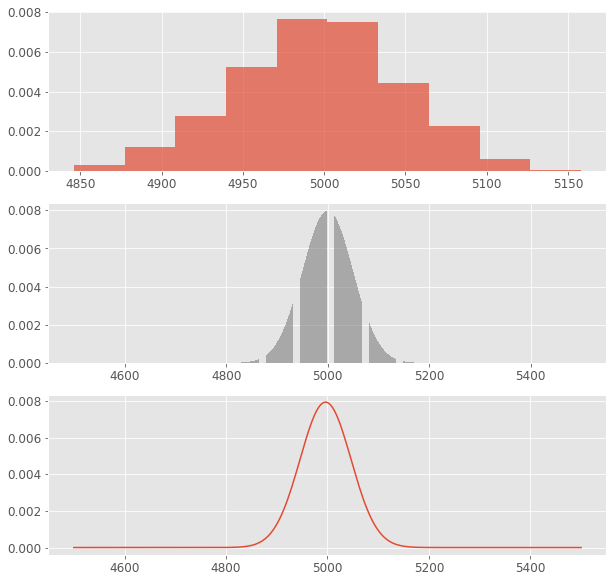

In [184]:
n = 10000
p = 0.5
flip_coin = stats.binom(n, p)
flip_coin_sample = flip_coin.rvs(1000)

flip_coin_norm = stats.norm(np.mean(flip_coin_sample), np.std(flip_coin_sample))

fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].hist(flip_coin_sample, density=True, alpha=0.7)

k = np.arange(4500,5500)
ax[1].bar(k, flip_coin.pmf(k), alpha=0.6, color='grey')

x = np.linspace(4500, 5500, 250)
ax[2].plot(x, flip_coin_norm.pdf(x))
;

<!-- Another example if needed: 

There are fifty people waiting in line at the DMV an hour before closing time. At this point, no one else will be allowed in to add to the line. The time it takes to serve a person has a mean of five minutes and a standard deviation of three minutes. Five people can be served at a time. What is the probability that all fifty people can be served within the last hour of the day? 



Assume IID

We are going to have some Random variables... the amount time it takes each person to be helped. 

$ X_i $ = minutes needed to serve the ith person 
$i$ has a range of 1 - 50

$$ X_1 + X_2 + \cdots + X_i $$ = Total minutes of service needed for all people to be served 


$$ X_1 + X_2 + \cdots + X_i \sim N(mean = 50*5, \sqrt{n}*\sigma ) $$


```
norm = stats.norm(50*5, 3*np.sqrt(50))

# P(X <- 60 * 5) 
#minutes of service available
norm.cdf(300)
```

As long as we know a mean and std of a potential situation we can determine using CLT that the normal distribution would approximately represent the sum of iid random variables. Therefore we can use Normal distribution to make some determinations.  -->

## The Central Limit Theorem: The Point

When we are concerned with a **sample mean**, the central limit theorem lets us derive the **actual distribution of the sample mean**.  This allows us to calculate probabilities about the sample mean.

We are going to make good use of this when we design statistical hypothesis tests.

### Example: CLT Based Confidence Interval for the Sample Mean

Consider our sample from a secret population, which we have used as a running example

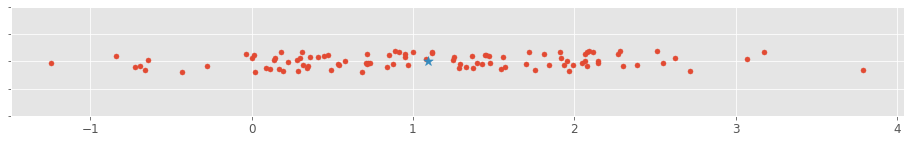

In [189]:
data = stats.norm(0.9, 1.0).rvs(100)

fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)
ax.scatter(np.mean(data),0, marker='*', s=100)

## Here are the facts we have accumulated about this situation

  - The sample mean is an approximation of the population mean: the expected value of the sample mean *is* the population mean.
  - The sample mean is approximately normally distributed, the mean and variance of this normal distribution can be computed in terms of the population mean and variance, and the size of the sample.
  
Let's denote by 
  - $\mu$ the population mean.
  - $\sigma^2$ the population variance.
  - $\bar x$ the **sample mean**.
  
Then we can summarize all this as

$$ \bar x \sim N \left( \mu, \frac{\sigma}{\sqrt{n}} \right) $$  

where $$ \frac{\sigma}{\sqrt{n}} $$ is the effective standard deviation of the sampling distribution of the sample mean, commonly called the [standard error.](https://en.wikipedia.org/wiki/Standard_error)  
<br>

If we subtract the population mean from both sides we get

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

Which allows us to make probabilistic statements about how far the sample mean is from the population mean.

A **confidence interval** is the answer to a question like this

> How far do I have to go to the left and the right of the sample mean so that 95% of the time (i.e. in 95% of possible samples) I will have enclosed the population mean?

Let $\alpha$ denote the distance you move to the left and right of the sample mean when drawing your interval.  In notation, we are asking to find $\alpha$ such that

$$ P(\bar x - \alpha \leq \mu \leq \bar x + \alpha) = 0.95 $$

This is the same as asking for

$$ P( - \alpha \leq \mu - \bar x \leq \alpha ) = 0.95 $$

The thing in the middle here, $\mu - \bar x$, has a known distribution!

$$ \bar x - \mu \sim N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $$

So, visually, we are looking for:

In [191]:
data = stats.norm(0.9, 1.0).rvs(100)

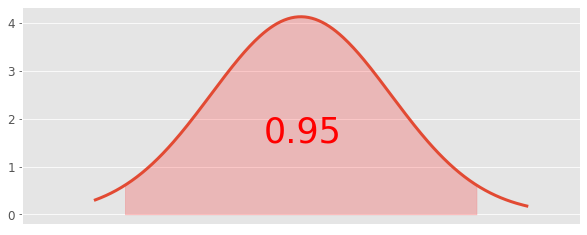

In [200]:
sample_mean = np.mean(data)
sample_varaince = np.var(data)
distribution_of_sample_minus_population_mean = stats.norm(0, np.sqrt(sample_varaince / len(data)))

fig, ax = plt.subplots(1, figsize=(10, 4))
x = np.linspace(min(distribution_of_sample_minus_population_mean.rvs(100)), max(distribution_of_sample_minus_population_mean.rvs(100)), num=250)
pdf = distribution_of_sample_minus_population_mean.pdf(x)
ax.plot(x, pdf, linewidth=3)

# Shade under curve
# Note: The 0.2 here is just for illustration, it does not correspond to
#       any particular value of alpha.

ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (distribution_of_sample_minus_population_mean.ppf(0.025) <= x) * (x <= distribution_of_sample_minus_population_mean.ppf(0.975)) ), color="red", alpha=0.2)
ax.text(-0.04, 1.5, "0.95", fontsize=35, color="red")
ax.set_xticks([]);

In [199]:
distribution_of_sample_minus_population_mean.ppf(0.025)

-0.1895073291405044

The shaded region is the area under the density between $-\alpha$ and $\alpha$. We want the **shaded region** to account for $0.95$ of the total area.

This means that each *half* of the shaded area to the *left and right* of zero should account for $0.475$ of the total area.

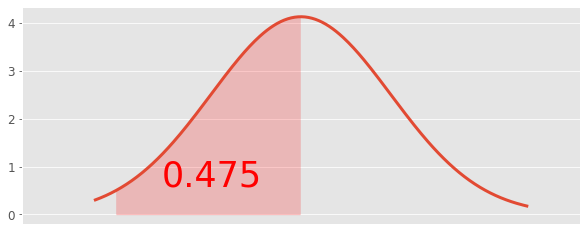

In [203]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (-0.2 <= x) * (x <= 0.0) ), color="red", alpha=0.2)
ax.text(-0.15, 0.6, "0.475", fontsize=35, color="red")
ax.set_xticks([]);

Which means that the "tail" to the left of $\alpha$ should account for $0.5 - 0.475 = 0.025$ of the total area.

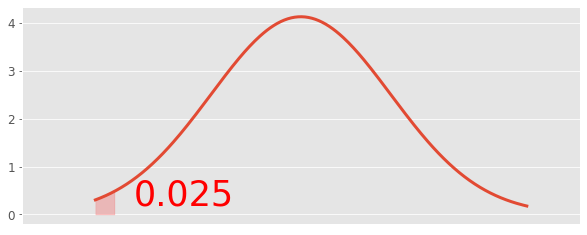

In [204]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.2) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.set_xticks([]);

It is **this kind of area that is computed by the distribution function**.

So, if we denote by $F$ the **distribution function of** $ N \left( 0, \frac{\sigma}{\sqrt{n}} \right) $, then we are after the value of $\alpha$ satisfying

$$ F(-\alpha) = 0.025 $$

Or $$F^{-1}(0.025) = -\alpha$$

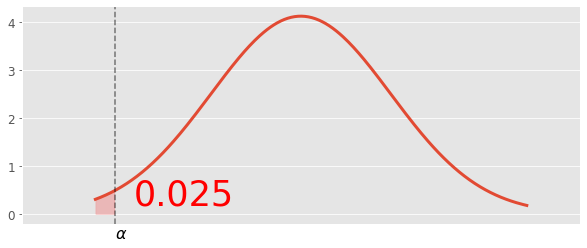

In [205]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ax.plot(x, pdf, linewidth=3)

# Shade under curve
ax.set_xlim(-0.3, 0.3)
ax.fill_between(x, pdf, 0, 
                where=( (x <= -0.2) ), color="red", alpha=0.2)
ax.text(-0.18, 0.2, "0.025", fontsize=35, color="red")
ax.axvline(x=-0.2, ymin=0.0, ymax=100, color="black", 
           linestyle='--', alpha=0.5)
ax.text(-0.2, -0.5, r"$\alpha$", fontsize=16)
_ = ax.set_xticks([]);

The **inverse of the distribution function** is often called the **percentile function**.

In [208]:
alpha = distribution_of_sample_minus_population_mean.ppf(0.025)
print(f'alpha: {alpha}')
print(f"Sample Mean: {sample_mean:2.2}")
print(f"95% confidence interval for the population mean: [{sample_mean + alpha:2.2}, {sample_mean - alpha:2.2}]")

alpha: -0.1895073291405044
Sample Mean: 0.93
95% confidence interval for the population mean: [0.74, 1.1]


Recall our interpretation here

> If we draw samples from the population and compute this confidence interval many, many times, then the computed interval should envelop the true population parameter approximately 95% of the time.

In this case, I wrote the code to create the population, so I know the correct answer

**The population mean is $0.1$.**

So let's run a simulation and see if everything worked.

In [209]:
def compute_confidence_interval(data, confidence_width):
    sample_mean = np.mean(data)
    sample_varaince = np.var(data)
    distribution_of_sample_minus_population_mean = stats.norm(0, np.sqrt(sample_varaince / len(data)))
    alpha = distribution_of_sample_minus_population_mean.ppf(0.5 - 
                                                            (confidence_width / 2.0))
    # Alpha is negative
    return sample_mean + alpha, sample_mean - alpha

In [218]:
population_mean_is_in_interval = []
for i in range(1000):
    new_data = stats.norm(0.1, 0.1).rvs(100)
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    population_mean_is_in_interval.append(left_endpoint <= 0.1 <= right_endpoint)

# print(alpha)
# print(left_endpoint)    
# print(right_endpoint)
# print(population_mean_is_in_interval)    
print(f"Proportion of confidence intervals containing the true parameter: {np.mean(population_mean_is_in_interval):2.2f}")

Proportion of confidence intervals containing the true parameter: 0.96


Which is what we would expect.

To dive the point home, we can plot all of these confidence intervals along with the true parameter, and visually see which do and do not contain the parameter.

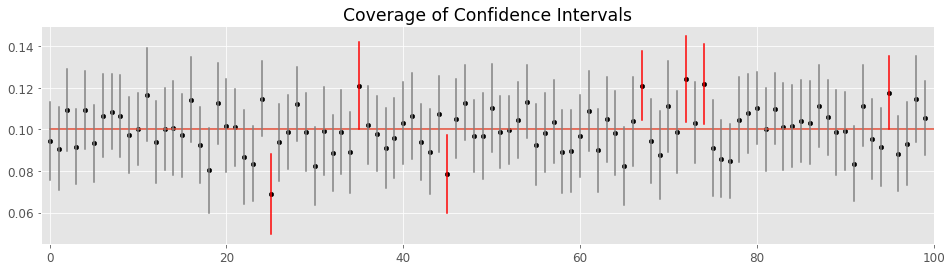

In [219]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot([0, 100], [0.1, 0.1])

for i in range(100):
    new_data = stats.norm(0.1, 0.1).rvs(100)
    sample_mean = new_data.mean()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    color = "grey" if (left_endpoint <= 0.1 <= right_endpoint) else "red"
    ax.plot([i, i], [left_endpoint, right_endpoint], color=color)
    ax.scatter([i], [sample_mean], c="black", s=20)
    ax.set_xlim(-1, 100)
    
ax.set_title("Coverage of Confidence Intervals");

### Check for Understanding: Confidence Interval
[UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) has an [Activity Recognition from Chest Mounted Accelerometer](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer) dataset which recorded uncalibrated accelerations a person experienced while performing various activities at 52 Hz (52 measurements per second).  In the `data` folder there is a subset of this data, which is vertical (z) acceleration a person experiences during two activities: walkin and climbing stairs.

What is the average vertical acceleration experienced by those walking, and by those climbing stairs?  For each, calculate the 95% confidence interval.

Instead of using the ppf, you can use the [68-95-99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) to approximate how many standard deviations away from the mean contain 95% of the data.

Steps to help...
1. Read in Data
2. How many samples are you working with? store that as variable n.
3. Find and store the means and stds of both our samples we are interested in. 
4. Use stds to determine our stadard error metric (This measures variability of a sample metric not individual data points)
5. Compute 95% confidence Interval using 68-95-99.7 rule

<!-- 
df = pd.read_csv('data/z_acceleration.csv')

n = df.shape[0]

walking_mean = df['walking'].mean()
climbing_mean = df['climbing_stairs'].mean()

walking_std = df['walking'].std()
climbing_std = df['climbing_stairs'].std()

walking_se = walking_std / np.sqrt(n)
climbing_se = climbing_std / np.sqrt(n)

walk_95_int = round(walking_mean - 2*walking_se, 2), round(walking_mean + 2*walking_se, 2)
climbing_95_int = round(climbing_mean - 2*climbing_se, 2), round(climbing_mean + 2*climbing_se, 2)


# We are 95% confident that the population mean lies within this margin of error. 
# More specifically if we were to take many samples, then 95% percent of the time the 
# the population mean would lie in this margin of error.
-->

In [221]:
ls

Review.ipynb                 images/
central_limit_theorem.ipynb  z_acceleration.csv
exercise.ipynb


In [222]:
z_acceleeration = pd.read_csv('z_acceleration.csv')
z_acceleeration.head()

,timestep,walking,climbing_stairs
0,1,2137,2172
1,2,2059,2181
2,3,2064,2176
3,4,2113,2151
4,5,2158,2120


In [233]:
z_acceleeration.describe()

,timestep,walking,climbing_stairs
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2041.780000,2132.129000
std,288.819436,51.185599,70.180565
min,1.000000,1894.000000,1977.000000
25%,250.750000,2005.000000,2079.750000
50%,500.500000,2035.000000,2120.500000
75%,750.250000,2072.000000,2180.000000
max,1000.000000,2229.000000,2377.000000


In [234]:
walk_mean = np.mean(z_acceleeration.walking)
walk_var = np.var(z_acceleeration.walking)

climb_mean = np.mean(z_acceleeration.climbing_stairs)
climb_var = np.var(z_acceleeration.climbing_stairs)

walk_norm = stats.norm(0, np.sqrt(walk_var/len(z_acceleeration.walking)))
climb_norm = stats.norm(0, np.sqrt(climb_var/len(z_acceleeration.climbing_stairs)))

confidence_width = 0.95
# alpha = walk_norm.ppf(0.5 - (confidence_width / 2.0))
# print(walk_mean - alpha, walk_mean + alpha )
print(walk_mean + walk_norm.ppf(0.025), walk_mean + walk_norm.ppf(0.975))
print(climb_mean + climb_norm.ppf(0.025), climb_mean + climb_norm.ppf(0.975))

2038.6091286147298 2044.9508713852701
2127.7814188817224 2136.4765811182774


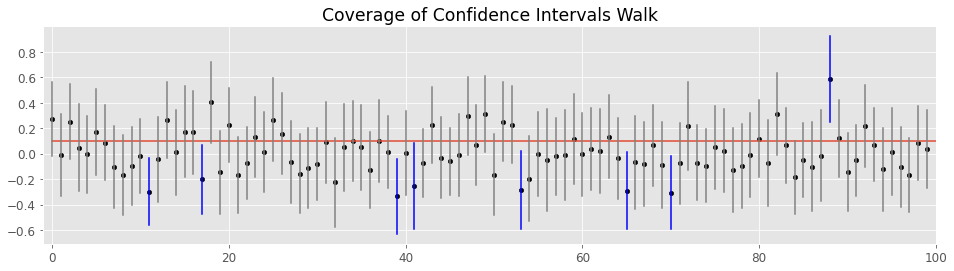

In [244]:
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.plot([0, 100], [0.1, 0.1])

for i in range(100):
    new_data = stats.norm(0, np.sqrt(walk_var/len(z_acceleeration.walking))).rvs(100)
    sample_mean = new_data.mean()
    left_endpoint, right_endpoint = compute_confidence_interval(new_data, 0.95)
    color = "grey" if (left_endpoint <= 0.1 <= right_endpoint) else "blue"
    ax.plot([i, i], [left_endpoint, right_endpoint], color=color)
    ax.scatter([i], [sample_mean], c="black", s=20)
    ax.set_xlim(-1, 100)
    
ax.set_title("Coverage of Confidence Intervals Walk");

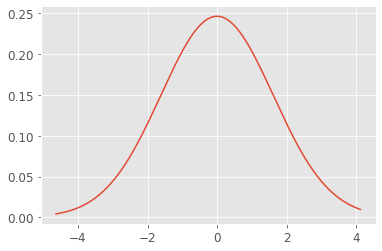

In [241]:
fig, ax = plt.subplots()
z_norm = stats.norm(0, np.sqrt(walk_var/len(z_acceleeration.walking)))
x = np.linspace(min(z_norm.rvs(100)), max(z_norm.rvs(100)), 250 )

ax.plot(x, z_norm.pdf(x));



In [242]:
np.mean(stats.norm(0, np.sqrt(walk_var/len(z_acceleeration.walking))).rvs(1000))

-0.049021525743541676